# REPRESENTATION WITH FEATURE CROSS

Despues de hacer este ejercicio sabras:

- usar tf.feature_column methods para representar features in different ways
 
- representar features as bins
 
- cross bins to create a feature cross

Como en los ejercicios anteriores, usaremos el dataset de houses of california

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import feature_column
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("ok")

ok


In [22]:
# load examples
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

#scale them
train_df['median_house_value'] /= 1000
test_df['median_house_value'] /= 1000

#shuffle the train 'cause it's ordered by longitud so when dividing between train and validation sets won't work other ways
train_df = train_df.reindex(np.random.permutation(train_df.index)) #re-mete valores en train_df con una permutacion randon de train_df

train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16929,-124.1,40.9,25.0,2392.0,474.0,1298.0,461.0,3.5,73.6
3777,-117.9,34.1,33.0,859.0,144.0,421.0,138.0,4.5,220.1
12489,-121.6,39.1,26.0,1405.0,204.0,627.0,215.0,4.2,94.2
14413,-122.1,37.4,33.0,1509.0,303.0,748.0,268.0,4.9,373.4
13937,-122.0,37.3,22.0,3583.0,758.0,1792.0,695.0,5.5,335.3


### REPRESENT LATITUDE AND LONGITUDE AS FLOAT VALUES

Este ejercicio trains sobre two features. Ademas, este ejercicio nos introduce a feature columns que es una manera sofisticada de representar features:

   - you call a tf.feature_column method to represent  a single feature, single feature cross, or single synthetic feature in the desired way. For example, to represent a certain feature as floating point values, call tf.feature_column.numeric_column . To represent a certain feature as a series of buckets or bins, call tf.feature_column.bucketiced_column.
    
   - Assemble the created represetations into a Python list.
    
A neighborhood's location is typically the most important feature in determining a house's value. The California Housing dataset provides two features, latitude and longitude that identify each neighborhood's location.

The following code cell calls --tf.feature_column.numeric_column-- twice, first to represent latitude as floating-point value and a second time to represent longitude as floating-point

This code cell specifies the features that you'll ultimately train the model on and how each of those features will be represented. The transformations (collected in fp_feature_layer) don't actually get applied until you pass a DataFrame to it, which will happen when we train the model.

Con esto aprendemos a crear modelos que utilicen tantos features como queramos

In [23]:
#primero se crea una lista que contendra las feature columns
feature_columns = []

#se crea a numerical feature column to represent latitude (es un array vacio donde van a ir las latitudes y tratadas como floats)
latitude = tf.feature_column.numeric_column("latitude")
feature_columns.append(latitude)

#se crea a numerical feature column to represent longitude (es un array vacio donde van a ir las latitudes y tratadas como floats)
longitude = tf.feature_column.numeric_column("longitude")
feature_columns.append(longitude)

#ahora convertimos feature_columns en un layer del modelo
fp_feature_layer = layers.DenseFeatures(feature_columns)



The transformations (collected in fp_feature_layer) don't actually get applied til you pass a DataFrame to it, which will happen when we train the model. The layer processes de raw input, acording to the transformations described by the feature columns, and pack the results into a numeric array. The model will train on this numeric array.

Ahora se crean las funciones que crean el modelo, lo entrenan y crean el grafico para representarlo

In [24]:
def build_model(learning_rate,feature_layer):
    
    model = tf.keras.models.Sequential()
    
    #añade el layer que contiene the feature columns
    model.add(feature_layer)
    
    #add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units = 1, input_shape=(1,)))
    
    #convert the layers asi unidos a pelo, en un modelo que tensorflow pueda entender
    model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, dataset, epochs, batch_size, label_name):
    
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    
    history = model.fit(x = features,
                       y = label,
                       batch_size = batch_size,
                       epochs = epochs,
                       shuffle = True)
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    
    return epochs, rmse

def test_model(model, dataset, batch_size):
    
    test_features = {name:np.array(value) for name, value in dataset.items()}
    test_label = np.array(test_features.pop(label_name))
    model.evaluate(x = test_features,
                  y= test_label,
                  batch_size = batch_size)

def plot_the_loss_curve(epochs, rmse):
    
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show() 

Ahora crea el modelo, entrenalo y evalualo

Epoch 1/30
Consider rewriting this model with the Functional API.


C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 13589.0078 - root_mean_squared_error: 116.5719
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 13488.7920 - root_mean_squared_error: 116.1413
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 13454.6201 - root_mean_squared_error: 115.9940
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 13402.1113 - root_mean_squared_error: 115.7675
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 13353.6465 - root_mean_squared_error: 115.5580
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 13320.5117 - root_mean_squared_error: 115.4145
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 13273.4902 - root_mean_squared_error: 115.2106
Epoch 8/30
170/170 [==============================] - 0s 2ms/step - loss: 13241.6709 - root_mean_squared_erro

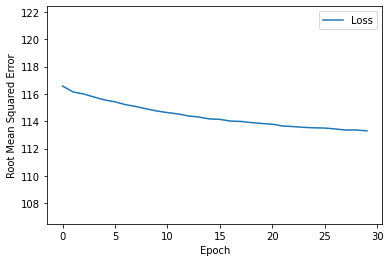


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 1ms/step - loss: 12213.2373 - root_mean_squared_error: 110.5135


In [25]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

my_model = None
my_model = build_model(learning_rate, fp_feature_layer) # añades el feature layer que has creado con latitude y longitude
                                                        # para q pueda crear el label que crea el cross feature y trate los datos

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)


print("\n: Evaluate the new model against the test set:")

test_model(my_model, test_df, batch_size)

Como podemos ver, representar las latitudes como variables floats para querer crear un modelo lo tiene sentido ya que la diferencia entre la latitud 35'7 y la 35'9, en cuanto al precio, es insignificante. Por eso es mejor agruparlas en buckets, es decir, convertir la variable continua a variable discreta

##### Vamos A Representar la Latitud y la Longitud in Buckets

El siguiente codigo representa la latitud y la longitud in buckets(bins). Each bin represents al the neighborhoods within a single degree. For example, neighborhoods in 35'2 and 3'9 are in the same bucket, but neighborhoods in latitude 36'3 are in different buckets.

The model will learn a separate weight for each bucket. for example, the model will learn one weight fo al the neighborhoods in the "35"bin, and a different for neighborhoods in the "36"bin, and so on. This representation will create aprox 20 buckets:

- 10 buckets for latitude
- 10 for longitude


In [26]:
#creas la diferencia de grados entre bucket y bucket. lo que comprende cada uno
resolution_in_degrees = 1.0

#creas a new empty list that will contain the generated featured columns
feature_columns_2 = []

#creas la columna para latitude
latitude_as_a_numeric_column = tf.feature_column.numeric_column("latitude") #creas un array numerico donde van las latitudes
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),        # creas una lista donde divides grado a grado desde
                                    int(max(train_df['latitude'])),         # la latitud mas pequeña hasta la mayor
                                    resolution_in_degrees))
#creas la feature column donde coge las latitudes y: 1º las transforma a float bonito con el lat_as_a_numeric, y luego las agrupa en
#los grupos grado a grado que tiene latitude_boundaries. Asi queda una array donde cada valor es una lista con todos valores
#del mismo grado, independientemente de los minnutos ' y segundos "
latitude_buckets = tf.feature_column.bucketized_column(latitude_as_a_numeric_column, latitude_boundaries)

feature_columns_2.append(latitude_buckets)

#Ahora lo mismo con las longitudes
longitude_as_a_numeric_column = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                      int(max(train_df['longitude'])),
                                      resolution_in_degrees))
longitude_buckets = tf.feature_column.bucketized_column(longitude_as_a_numeric_column, longitude_boundaries)

feature_columns_2.append(longitude_buckets)

#ahora creas el layes para tratar los datos que los meta a cada uno en su bucket

buckets_feature_layer = layers.DenseFeatures(feature_columns_2)


Ahora entrenamos al modelo con este nuevo layer 

Epoch 1/30
Consider rewriting this model with the Functional API.


C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 50987.1914 - root_mean_squared_error: 225.8034
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 42030.6211 - root_mean_squared_error: 205.0137
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 34286.9805 - root_mean_squared_error: 185.1674
Epoch 4/30
170/170 [==============================] - 0s 2ms/step - loss: 27803.2520 - root_mean_squared_error: 166.7431
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 22483.4336 - root_mean_squared_error: 149.9448
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 18335.7969 - root_mean_squared_error: 135.4097
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 15268.1152 - root_mean_squared_error: 123.5642
Epoch 8/30
170/170 [==============================] - 0s 2ms/step - loss: 13139.4082 - root_mean_squared_erro

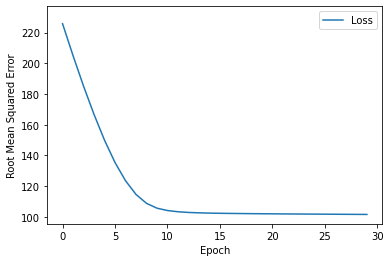


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 10181.5303 - root_mean_squared_error: 100.9036


In [27]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

my_model = None
my_model = build_model(learning_rate, buckets_feature_layer) # añades el feature layer que has creado con latitude y longitude
                                                             # trata al latutude y longitude como columnas de buckets pero independientes
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)


print("\n: Evaluate the new model against the test set:")

test_model(my_model, test_df, batch_size)

Como se puede ver cuando hemos trabajado con buckets obtenemos un resultado mucho mucho mejor. Aun así, podemos mejorarlo: Vamos a representar la localizacion como un feature cross. De esta forma debemos obtener un mejor resultado.

Antes hemos representado la latitud en one-dimension buckets y la longitud en one-dimension buckets. Asique ahora vamos a crear one feature cross, crossing los 10 buckets de uno con los de otro. Creating then a grid of 100 cells. The model will learn a weight por each of the cells

In [28]:
#seguir con la parte de codigo del task3
# asi a simple vista se puede ver que se crean las columnas como antes para obetener los 10 bukets de cada uno y luego  se 
#ccrea otra columna donde cross los dos y esa es la que se le mete a la lista de feature_columns

In [40]:
resolution_in_degrees = 0.5
bucket_cross_feature_column = []

latitude_as_numeric = tf.feature_column.numeric_column("latitude")
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])),
                                    int(max(train_df['latitude'])),
                                    resolution_in_degrees))
latitude_buckets = tf.feature_column.bucketized_column(latitude_as_numeric, latitude_boundaries)


longitude_as_numeric = tf.feature_column.numeric_column("longitude")
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])),
                                    int(max(train_df['longitude'])),
                                    resolution_in_degrees))
longitude_buckets = tf.feature_column.bucketized_column(longitude_as_numeric, longitude_boundaries)


#una vez creados las columnas de buckets de latitud y longitud se hace la columna de feature cross que une a ambas

latitude_x_longitude = tf.feature_column.crossed_column([latitude_buckets, longitude_buckets], hash_bucket_size=100)
crossed_feature = tf.feature_column.indicator_column(latitude_x_longitude)
bucket_cross_feature_column.append(crossed_feature)

feature_crossed_layer = layers.DenseFeatures(bucket_cross_feature_column)
print("ok")

ok


Epoch 1/30
Consider rewriting this model with the Functional API.


C:\Users\Candel\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Consider rewriting this model with the Functional API.
170/170 [==============================] - 1s 2ms/step - loss: 52957.1133 - root_mean_squared_error: 230.1241
Epoch 2/30
170/170 [==============================] - 0s 2ms/step - loss: 46942.7617 - root_mean_squared_error: 216.6628
Epoch 3/30
170/170 [==============================] - 0s 2ms/step - loss: 41441.2773 - root_mean_squared_error: 203.5713
Epoch 4/30
170/170 [==============================] - ETA: 0s - loss: 36605.7812 - root_mean_squared_error: 191.326 - 0s 2ms/step - loss: 36431.1602 - root_mean_squared_error: 190.8695
Epoch 5/30
170/170 [==============================] - 0s 2ms/step - loss: 31906.2129 - root_mean_squared_error: 178.6231
Epoch 6/30
170/170 [==============================] - 0s 2ms/step - loss: 27862.8223 - root_mean_squared_error: 166.9216
Epoch 7/30
170/170 [==============================] - 0s 2ms/step - loss: 24287.1270 - root_mean_squared_error: 155.8433
Epoch 8/30
170/170 [=========================

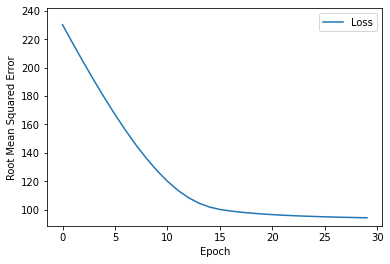


: Evaluate the new model against the test set:
Consider rewriting this model with the Functional API.
30/30 [==============================] - 0s 2ms/step - loss: 8987.5029 - root_mean_squared_error: 94.8024


In [41]:
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = "median_house_value"

my_model = None
my_model = build_model(learning_rate, feature_crossed_layer) # añades el feature layer que has creado con latitude y longitude
                                                        # para q pueda crear el label que crea el cross feature y trate los datos

epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

plot_the_loss_curve(epochs, rmse)


print("\n: Evaluate the new model against the test set:")

test_model(my_model, test_df, batch_size)

Como podemos ver el error es menor que antes cuando se trataban como buckets indepedientes.

Y cuanto menor es el resolution_in_degrees, mas precision tiene ya que abarca menos km cuadrados y ajusta mas las areas (teniendo en cuenta que resolution_in_degrees = 1.0 son sobre 100km cuadrados). tampoco sera bueno hacerlo demasiado pequeño porque volvemos a lo que teniamos al principio que por unos pocos km no cambia nada, un punto medio.